In [1]:
from pymystem3 import Mystem
from string import punctuation
m = Mystem()
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
import zstandard
import pathlib
import os
import ujson as json
import pandas as pd
from nltk import ngrams
import re
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy 
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import calendar
import spacy
import stanza
import spacy_stanza
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apaarbawa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df1 = pd.read_csv("solovyov_telegram_data.csv")
df2 = pd.read_csv("Colonelcassad_telegram_data.csv")
df3 = pd.read_csv("Kadyrov_95_telegram_data.csv")
df4 = pd.read_csv("voenkor_telegram_data.csv")

df1["channel_name"] = "Solovyov"
df2["channel_name"] = "Colonelcassad"
df3["channel_name"] = "Kadyrov_95"
df4["channel_name"] = "Операция Z"

pdList = [df1, df2, df3, df4] 
df = pd.concat(pdList)

In [3]:
df["post_datetime"] = pd.to_datetime(df['post_datetime'])
df['post_date'] = pd.to_datetime(df['post_datetime'].dt.date)

df = df[df["post_date"] >= datetime(2021, 3, 11)]
df.reset_index(drop=True, inplace=True)

In [4]:
for i in range(len(df)):
    if (df.loc[i,"reactions"] is np.nan) or (df.loc[i,"reactions"] == "{}"):
        #df.loc[i, "popularity_score"] = -1
        df.loc[i, "popularity_score"] = 0
    else:
        total_reactions = sum([v for k,v in eval(df.loc[i,"reactions"]).items()])
        df.loc[i, "popularity_score"] = total_reactions/df.loc[i, "post_views"]
        
df["post_month"] = df["post_date"].apply(lambda x: f'{x.month}-{x.year}')

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df["scaled_popularity_score"] = scaler.fit_transform(df[['popularity_score']])

In [6]:
#df[df['popularity_score']<0.03][["reactions", "post_views", "popularity_score", "post_month"]]

In [7]:
pop_df = df[df['popularity_score']>0]

In [ ]:
#df[df['popularity_score']>0

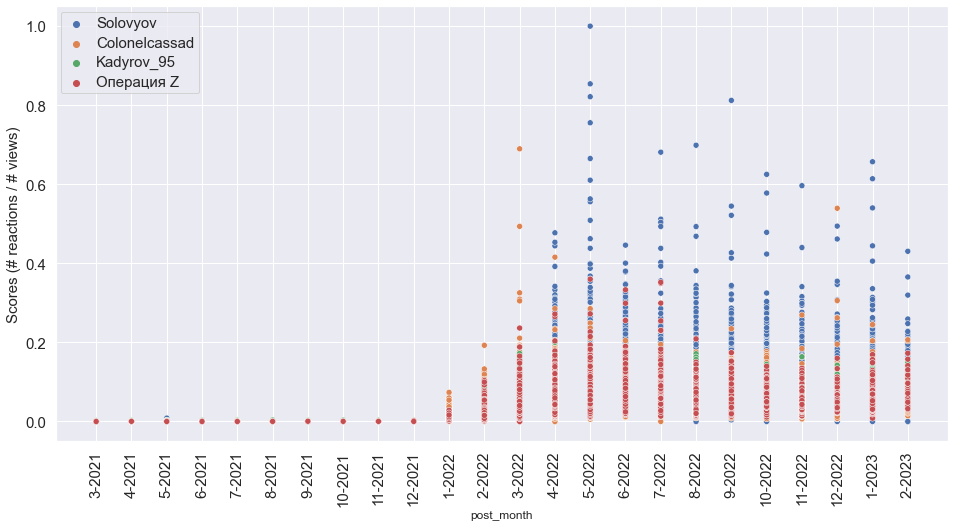

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.set(color_codes=True)
sns.scatterplot(x="post_month", y="scaled_popularity_score", hue = "channel_name",data=df)

# Add a title to the graph
#plt.title("Popularity Scores of the posts over months", fontsize = 16)
plt.xticks(rotation=90, size=15)
#plt.xlabel("Post Month", fontsize = 15)
plt.ylabel("Scores (# reactions / # views)", fontsize = 15)
plt.yticks(size=15)
plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15')
#plt.ylim((0.00,0.40))

# Show the plot
plt.savefig("popularity_score.png")
plt.show()